# Numerical Linear Regression

## Steps

1. Gradient descent with one variable
2. Newton method with one variable
3. Gradient descent with two (and more) variables
4.  Newton method with two (and more) variables

## Gradient descent with one variable 

Let us start a simple linear model $Y = aX$ with one feature $X$ and one response $Y$, a slope of $a$ that is to be learned assuming an intercept $b=0$.

We generate data for $Y=2X, X\in [1,10]$ with a random error that is normally distributed proportional to $\mathcal{N}(0,10)$. 

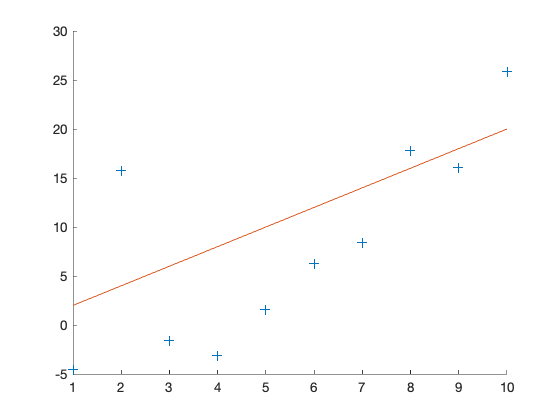

In [39]:
rng(1);
N = 10;
a0 = 2;
X = 1:N;
Y = a0*X + normrnd(0,10,1,N);
scatter(X,Y,'+')
hold on
plot(X,a0*X)

We learn $\hat a$ (parameter, weight) from the data and expect it to be $\approx 2$. Therefore, we minimize the residual sum of squares as our optimization goal (loss, error) function, i.e., $\hat a = \min \arg RSS(a)$ where $RSS(a) =\sum_{i=1}^{n}(y_i - a x_i)^2$.  

For the sake of demonstrating the numerical approach, we deliberately ignore that an analytic solution exists. 

Let's define and plot $RSS$ as a function of $a$. We chose the range of $a$ around the (actually unknown) minimum of $\approx 2$. 

In [40]:
%%file rss.m
function err = rss(a,X,Y)
    n = length(X);
    err = 0;
    for i=1:n
        err = err + (Y(i)-a*X(i))^2;
    end
end

Created file '/Users/wlomsi/Documents/ProjekteUni/Vorlesungen/ML 4DV660+4DV661+4DV652/Public ML Notebooks/rss.m'.


In [41]:
%%file plot_rss.m
function plot_rss(f,a_range)
    err_range = arrayfun(f,a_range);
    plot(a_range,err_range)
end

Created file '/Users/wlomsi/Documents/ProjekteUni/Vorlesungen/ML 4DV660+4DV661+4DV652/Public ML Notebooks/plot_rss.m'.



err =

  539.2380




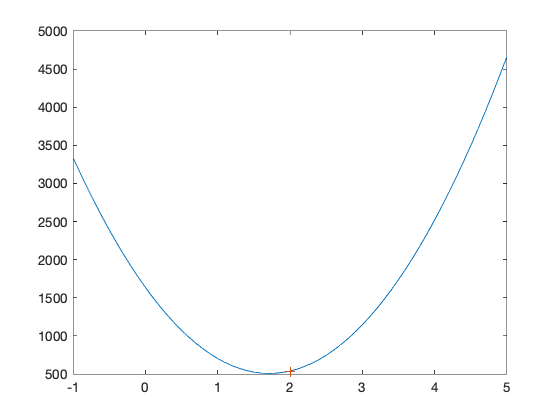

In [42]:
f = @(a)(rss(a,X,Y));
a_range = a0-3:0.1:a0+3;
plot_rss(f,a_range)
hold on
plot(a0,f(a0),'+')
err = f(a0)

The gradient of $RSS(a)$ for any $a$ is defiend as:

$$
\begin{aligned}
\nabla RSS(a) &= \frac{\partial RSS(a)}{\partial a}\\
&=\frac{\partial \sum_{i=1}^{n}(y_i- a x_i)^2}{\partial a}\\
&=\sum_{i=1}^{n}2(y_i- a x_i)(-x_i)\\
&=-2\sum_{i=1}^{n}(y_i- a x_i)x_i
\end{aligned}
$$

In [43]:
%%file grad_rss.m
function grad_err = grad_rss(a, X, Y)
    n = length(X);
    grad_err = 0;
    for i=1:n
        grad_err = grad_err + (Y(i) - a*X(i))*X(i);
    end
    grad_err = -2*grad_err;
end

Created file '/Users/wlomsi/Documents/ProjekteUni/Vorlesungen/ML 4DV660+4DV661+4DV652/Public ML Notebooks/grad_rss.m'.


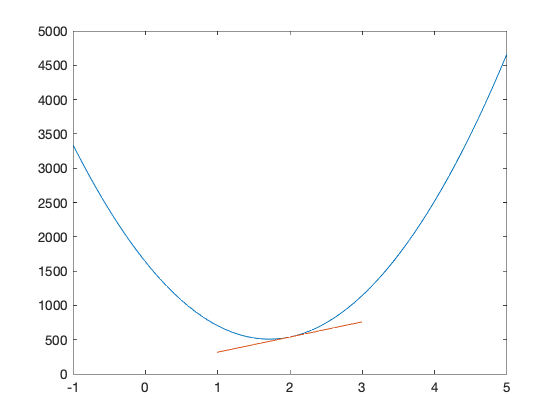

In [44]:
ff = @(a)(grad_rss(a,X,Y));
fff = @(a)((a-a0)*ff(a0)+f(a0));
a_range = a0-3:0.1:a0+3;
plot_rss(f,a_range)
hold on
a_range = a0-1:0.1:a0+1;
plot_rss(fff,a_range)

We iteratively approximate $\hat a$ with gradient descent, i.e., starting with an initial guess $a_0$ and a learning rate of $\varepsilon$ we iterate over

$$
\begin{aligned}
a_{k+1} &= a_k - \varepsilon \nabla RSS(a_k) \\
&= a_k + 2 \varepsilon \sum_{i=1}^{n}(y_i- a_k x_i)x_i
\end{aligned}
$$

In [46]:
%%file grad_desc_rss.m
function as = grad_desc_rss(K, a0, learning_eps, f, ff, verbose)
    as = zeros(K+1,1);
    as(1)=a0;
    for k = 1:K
        as(k+1)= as(k) - learning_eps * ff(as(k));
        if verbose
            line([as(k),as(k+1)],[f(as(k)),f(as(k+1))], 'LineStyle', ':')
%            plot (as(k+1), f(as(k+1)),'x');
            hold on
        end
    end
    if verbose
        a_range = min(as)-1:0.1:max(as)+1;
        plot_rss(f,a_range)
        fff = @(a)((a-a0)*ff(a0)+f(a0));
        a_range = a0-1:0.1:a0+1;
        plot_rss(fff,a_range)
        fff = @(a)((a-as(k+1))*ff(as(k+1))+f(as(k+1)));
        a_range = as(k+1)-1:0.1:as(k+1)+1;
        plot_rss(fff,a_range);
    end
end

Created file '/Users/wlomsi/Documents/ProjekteUni/Vorlesungen/ML 4DV660+4DV661+4DV652/Public ML Notebooks/grad_desc_rss.m'.



as =

    2.0000
    1.7789
    1.7280
    1.7163
    1.7137
    1.7130
    1.7129
    1.7129
    1.7129
    1.7129
    1.7128




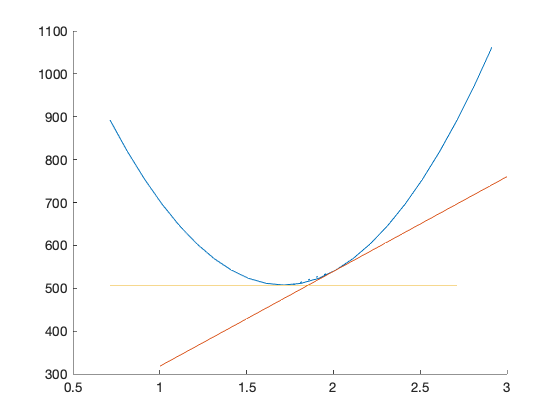

In [50]:
K = 10;
learning_eps = 0.001;
%learning_eps = 0.0001;
%learning_eps = 0.003;
as = grad_desc_rss(K, a0, learning_eps, f, ff, true)

*Try different learning rates and interpret the effect. Your answer goes here!*

Here the final result.

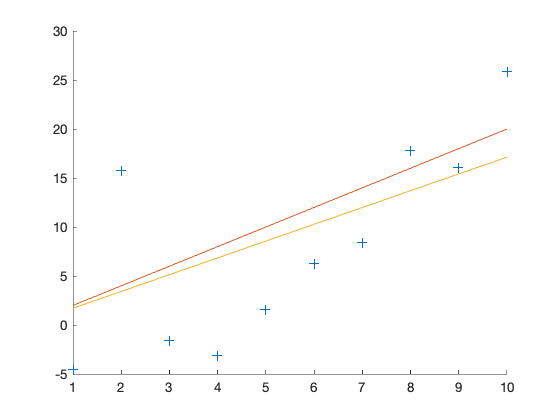

In [51]:
scatter(X,Y,'+')
hold on
plot(X,a0*X)
plot(X,as(K+1)*X)

## Newton method with one variable

It is obviously difficult to set the learning rate right. To help this, the Newton method adjusts the learning rate $\varepsilon$ in each step to $1/h(a_i)$, i.e., the inverse of the second derivative $h(a)$ of the loss function at the current location $a_i$. In our case it is the inverse of the second derivative of $RSS$.

$$
\begin{aligned}
h(a) &= \frac{\partial^2 RSS(a)}{\partial a^2}\\
&=\frac{\partial (-2 \sum_{i=1}^{n}(y_i- a x_i)x_i)}{\partial a}\\
&=2\sum_{i=1}^{n}x_i^2\\
\end{aligned}
$$

We observe, that $h$ is a constant w.r.t. $a$ and, hence, it does not change during iteration in our quadratic optimization case.

In [52]:
h = 2*sum(X.^2);
learning_eps = 1/h


learning_eps =

    0.0013





ans =

    2.0000
    1.7128




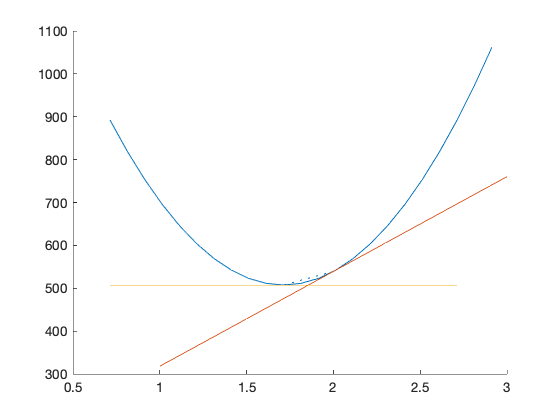

In [53]:
grad_desc_rss(1, a0, learning_eps, f, ff, true)

## Gradient descent with two (and more) variables

Let us add an intercept to the linear model $Y = aX +b$ still with one feature $X$ and one response $Y$, but with slope $a$ and intercept $b$ to be learned.

We generate data for $Y=2X - 3$ with a random error that is normally distributed proportional to $\mathcal{N}(0,10)$. 

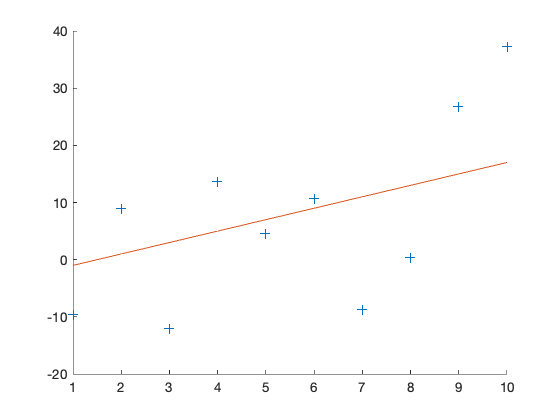

In [54]:
a0 = 2;
b0 = -3;
X = 1:N;
Y = a0*X + b0 + normrnd(0,10,1,N);
scatter(X,Y,'+')
hold on
plot(X,a0*X + b0)

We learn $\hat a$ and $\hat b$ from the data and expect them to be $\approx 2$ and $\approx -3$, respectively. 
Therefore, we minimize the residual sum of squares $RSS=\sum_{i=1}^{n}(y_i-\hat a x_i - \hat b)^2$.  

Let's define and 3D-plot the modified $RSS$ as a function of $a$ and $b$. We chose the ranges of $a$ and $b$ around the (actually unknown) expected minima of $\approx 2$ and $\approx -3$, respectively. 

In [55]:
%%file rss2.m
function err = rss2(a,b,X,Y)
    n = length(X);
    err = 0;
    for i=1:n
        err = err + (Y(i)-a*X(i)-b)^2;
    end
end

Created file '/Users/wlomsi/Documents/ProjekteUni/Vorlesungen/ML 4DV660+4DV661+4DV652/Public ML Notebooks/rss2.m'.


In [56]:
%%file plot3d.m
function plot3d(f,A,B,real3d)
    Z = arrayfun(f,A,B);
    if real3d
        surf(A,B,Z)
    else
        contour(A,B,Z)
    end
    colorbar
end

Created file '/Users/wlomsi/Documents/ProjekteUni/Vorlesungen/ML 4DV660+4DV661+4DV652/Public ML Notebooks/plot3d.m'.


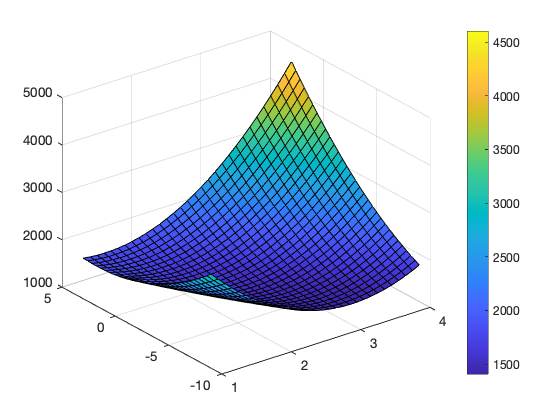

In [57]:
f = @(a, b)(rss2(a,b,X,Y));
[A,B] = meshgrid(a0-1:0.1:a0+2,b0-6:0.4:b0+6);
plot3d(f, A, B, true) %3D surface

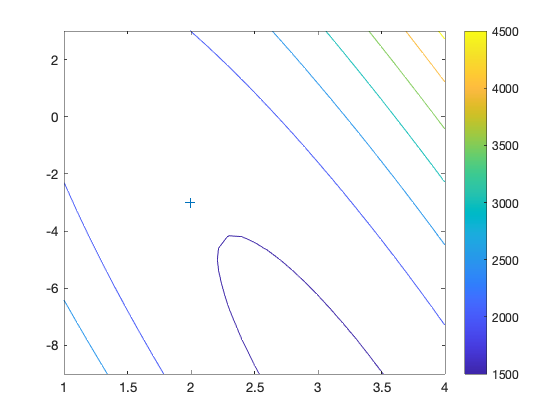

In [58]:
plot3d(f, A, B, false) %3D contour
hold on
plot(a0,b0,'+')

*What can you say about the loss function space? Your answer goes here.* 

The gradient of $RSS(a,b)$ for any $a, b$ is defiend as:

$$
\begin{aligned}
\nabla RSS(a,b) &= \left [ \frac{\partial RSS(a,b)}{\partial a}, \frac{\partial RSS(a,b)}{\partial b}\right ]^T\\
&= \left [ \frac{\partial \sum_{i=1}^{n}(y_i- a x_i-b)^2}{\partial a}, 
           \frac{\partial \sum_{i=1}^{n}(y_i- a x_i-b)^2}{\partial b}\right ]^T \\
&= \left [ \sum_{i=1}^{n}2(y_i- a x_i-b)(-x_i),\sum_{i=1}^{n}2(y_i- a x_i-b)(-1) \right ]^T \\
&= \left [ -2\sum_{i=1}^{n}(y_i- a x_i-b)x_i,-2\sum_{i=1}^{n}(y_i- a x_i-b) \right ]^T \\
&= -2 \left [ \sum_{i=1}^{n}(y_i- a x_i-b)x_i, \sum_{i=1}^{n}(y_i- a x_i-b) \right ]^T 
\end{aligned}
$$

In [59]:
%%file grad_rss2.m
function grad_w = grad_rss2(a, b, X, Y)
    n = length(X);
    grad_a = 0;
    grad_b = 0;
    for i=1:n
        tmp = Y(i) - a*X(i) - b;
        grad_a = grad_a + tmp *X(i);
        grad_b = grad_b + tmp;
    end
    grad_a = -2*grad_a;
    grad_b = -2*grad_b;
    grad_w = [grad_a; grad_b];
end

Created file '/Users/wlomsi/Documents/ProjekteUni/Vorlesungen/ML 4DV660+4DV661+4DV652/Public ML Notebooks/grad_rss2.m'.


In [60]:
%%file grad_desc_rss2.m
function [as, bs] = grad_desc_rss2(K, a0, b0, learning_eps, f, ff, verbose)
    as = zeros(K+1,1);
    bs = zeros(K+1,1);
    as(1)=a0;
    bs(1)=b0;
    for k = 1:K
        grad_w = ff(as(k),bs(k));
        grad_a = grad_w(1);
        grad_b = grad_w(2);
        %learning_eps * [grad_a, grad_b].'
        as(k+1)= as(k) - learning_eps * grad_a;
        bs(k+1)= bs(k) - learning_eps * grad_b;
        if verbose
            line([as(k),as(k+1)],[bs(k),bs(k+1)])
            hold on
        end
    end
    if verbose
        alow = min([as.', a0-2]);
        ahigh = max([as.', a0+2]);
        blow = min([bs.', b0-9]);
        bhigh = max([bs.', b0]);
        [A,B] = meshgrid(alow:0.1:ahigh,blow:0.4:bhigh);
        plot3d(f, A, B, false) %3D contour
    end
end

Created file '/Users/wlomsi/Documents/ProjekteUni/Vorlesungen/ML 4DV660+4DV661+4DV652/Public ML Notebooks/grad_desc_rss2.m'.


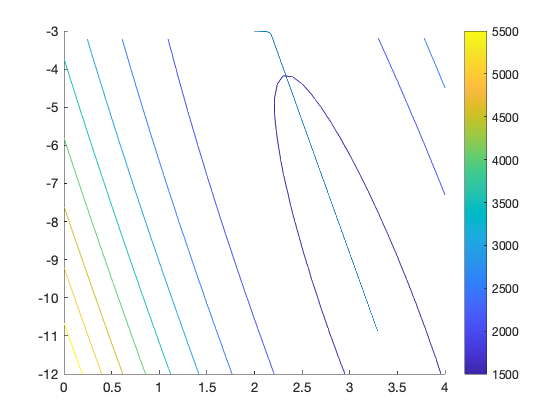

In [66]:
ff = @(a,b)(grad_rss2(a,b,X,Y));
K = 1000;
learning_eps = 0.001;
%learning_eps = 0.0001;
%learning_eps = 0.0025;
%learning_eps = 0.00255;
[as, bs] = grad_desc_rss2(K, a0, b0, learning_eps, f, ff, true);
[as, bs].';

*Try different learning rates and interpret the effect. Your answer goes here!*

Here the final result.

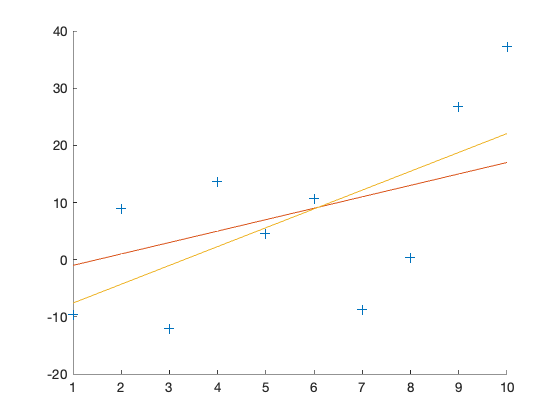

In [67]:
scatter(X,Y,'+')
hold on
plot(X,a0*X+b0)
plot(X,as(K+1)*X+bs(K+1))
hold off

## Newton method with two (and more) variables

It is still difficult to set the learning rate right. To help this, the Newton method for one variable generalizes:

$$
[a_{k+1}, b_{k+1}] = [a_k,b_k] - H_{RSS}(a_k,b_k)^{-1} \nabla RSS(a_k,b_k) 
$$

where $H_{RSS}$ is the Hessian matrix of $RSS$. 

The Hessian matrix is defined as:
$$
\begin{aligned}
H_{RSS}(a,b) &= 
\begin{bmatrix}
\frac{\partial^2 RSS(a,b)}{\partial a^2} & \frac{\partial^2 RSS(a,b)}{\partial a \partial b} \\
\frac{\partial^2 RSS(a,b)}{\partial b \partial a} & \frac{\partial^2 RSS(a,b)}{\partial b^2} 
\end{bmatrix}\\
&=
\begin{bmatrix}
\frac{\partial (-2\sum_{i=1}^{n}(y_i- a x_i-b)x_i)}{\partial a} & \frac{\partial (-2\sum_{i=1}^{n}(y_i- a x_i-b)x_i)}{\partial b} \\
\frac{\partial (-2\sum_{i=1}^{n}(y_i- a x_i-b)) }{\partial a} & \frac{\partial (-2\sum_{i=1}^{n}(y_i- a x_i-b))}{\partial b} 
\end{bmatrix}\\
&=
\begin{bmatrix}
2\sum_{i=1}^{n}x_i^2 & 2\sum_{i=1}^{n}x_i \\
2\sum_{i=1}^{n}x_i & 2n
\end{bmatrix}\\
&=2
\begin{bmatrix}
\sum_{i=1}^{n}x_i^2 & \sum_{i=1}^{n}x_i \\
\sum_{i=1}^{n}x_i & n
\end{bmatrix}\\
\end{aligned}
$$

As in the case for one variable, we observe that $H_{RSS}$ is a constant matrix, i.e., it does not change during the iterations in our quadratic optimization case.

In [30]:
H=zeros(2);
H(1,1)=2*sum(X.^2);
H(1,2)=2*sum(X);
H(2,1)=H(1,2);
H(2,2)=2*N
H_inv = inv(H)


H =

   770   110
   110    20


H_inv =

    0.0061   -0.0333
   -0.0333    0.2333




Recall the inverse of a $2\times 2$ matrix $H$: 

$$
\begin{aligned}
H^{-1} &=\frac{1}{h_{11}h_{22}-h_{12}h_{21}}
\begin{bmatrix}
h_{22} & -h_{12} \\
-h_{21} & h_{11} 
\end{bmatrix}\\
\end{aligned}
$$

A learning rate $\varepsilon$ only scales the gradient vector; a Hessian matrix scales and rotates the gradient vector. Check how this concrete Hessian matrix transforms (scales and rotates) a unit vector:

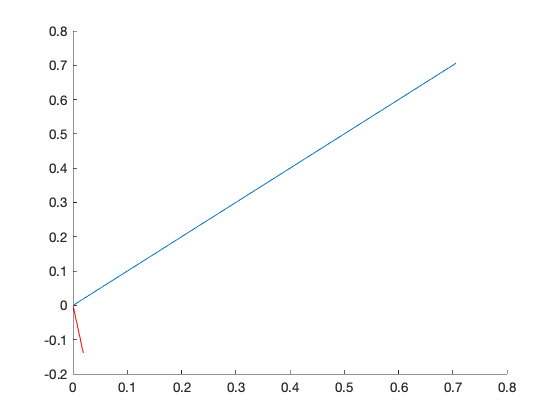

In [68]:
v=[1/sqrt(2),1/sqrt(2)];
line([0,v(1)],[0,v(2)])
v2 = -H_inv * v.';
line([0,v2(1)],[0,v2(2)],'color','r')

In [69]:
%%file newton_rss2.m
function ab = newton_rss2(K, a0, b0, H, f, ff, verbose)
    H_inv = inv(H);
    ab = zeros(2,K+1);
    ab(1,1)=a0;
    ab(2,1)=b0;
    for k = 1:K
        grad_w = ff(ab(1,k),ab(2,k));
        grad_a = grad_w(1);
        grad_b = grad_w(2);
        %H_inv * [grad_a, grad_b].'
        ab(:,k+1)= ab(:,k) - H_inv * [grad_a, grad_b].';
        if verbose
            line([ab(1,k),ab(1,k+1)],[ab(2,k),ab(2,k+1)])
            hold on
        end
    end
    if verbose
        alow = min([ab(1,:), a0-2]);
        ahigh = max([ab(1,:), a0+2]);
        blow = min([ab(2,:), b0-9]);
        bhigh = max([ab(2,:), b0+0]);
        [A,B] = meshgrid(alow:0.1:ahigh,blow:0.4:bhigh);
        plot3d(f, A, B, false) %3D contour
    end
end

Created file '/Users/wlomsi/Documents/ProjekteUni/Vorlesungen/ML 4DV660+4DV661+4DV652/Public ML Notebooks/newton_rss2.m'.



ab_newton =

    2.0000    3.3113    3.3113
   -3.0000  -11.0042  -11.0042




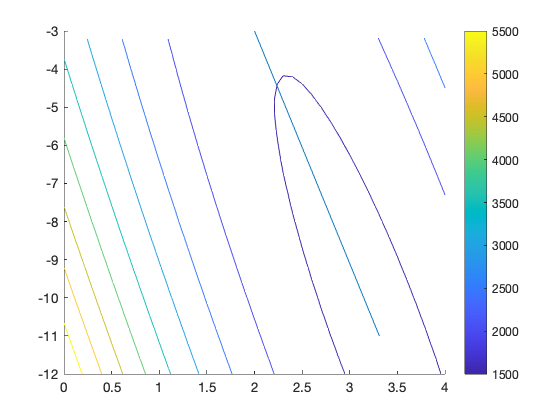

In [70]:
K=2;
ab_newton = newton_rss2(K, a0, b0, H, f, ff, true)

In [71]:
rss_0 = f(a0,b0)
rss_opt = f(ab_newton(1,size(ab_newton,2)),ab_newton(2,size(ab_newton,2)))


rss_0 =

   1.5473e+03


rss_opt =

   1.3992e+03




The Newton method could overshoot the minimum (if the loss function is not convex or due to numerical errors). Therefore, the relaxed or damped Newton's method introduces a damping factor $0<\gamma \leq 1$. Also, we exit when we overshoot the optimum.

In [72]:
%%file damped_newton_rss2.m
function res = damped_newton_rss2(K, a0, b0, H, gamma, f, ff, verbose)
    H_inv = gamma*inv(H);
    ab = zeros(2,K+1);
    ab(1,1)=a0;
    ab(2,1)=b0;
    for k = 1:K
        grad_w = ff(ab(1,k),ab(2,k));
        grad_a = grad_w(1);
        grad_b = grad_w(2);
        %H_inv * [grad_a, grad_b].'
        ab(:,k+1)= ab(:,k) - H_inv * [grad_a, grad_b].';
        if f(ab(1,k+1),ab(2,k+1)) >= f(ab(1,k),ab(2,k)) 
            k=k-1;
            break
        end
        if verbose
            line([ab(1,k),ab(1,k+1)],[ab(2,k),ab(2,k+1)])
            hold on
        end
    end
    res = ab(:,1:k+1);
    if verbose
        alow = min([ab(1,:), a0-2]);
        ahigh = max([ab(1,:), a0+2]);
        blow = min([ab(2,:), b0-9]);
        bhigh = max([ab(2,:), b0+0]);
        [A,B] = meshgrid(alow:0.1:ahigh,blow:0.4:bhigh);
        plot3d(f, A, B, false) %3D contour
    end
end

Created file '/Users/wlomsi/Documents/ProjekteUni/Vorlesungen/ML 4DV660+4DV661+4DV652/Public ML Notebooks/damped_newton_rss2.m'.



ab_newton =

  Columns 1 through 7

    2.0000    3.1801    3.2981    3.3099    3.3111    3.3112    3.3113
   -3.0000  -10.2037  -10.9241  -10.9962  -11.0034  -11.0041  -11.0041

  Columns 8 through 9

    3.3113    3.3113
  -11.0042  -11.0042




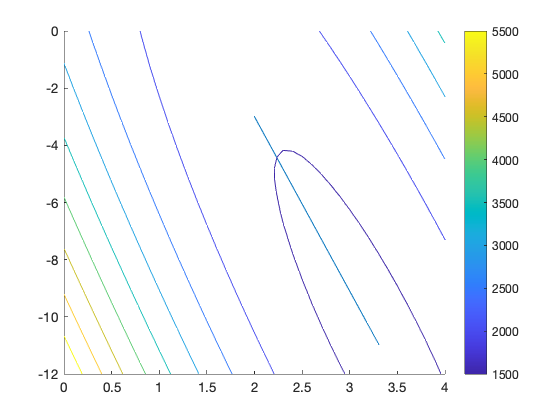

In [74]:
K=100;
gamma=0.1;
gamma=0.9;
ab_newton = damped_newton_rss2(K, a0, b0, H, gamma, f, ff, true)

In [37]:
rss_0 = f(a0,b0)
rss_opt = f(ab_newton(1,size(ab_newton,2)),ab_newton(2,size(ab_newton,2)))


rss_0 =

   1.5473e+03


rss_opt =

   1.3992e+03




*Try different damping factors and interpret the effect. Your answer goes here!*

Here the final result.